In [74]:
import numpy as np
from qiskit_textbook.tools import random_state
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit,QuantumRegister, ClassicalRegister, transpile, Aer, IBMQ, assemble, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit_textbook.tools import random_state
from qiskit.extensions import Initialize
from qiskit.providers.aer.noise import NoiseModel
import qiskit.quantum_info as qi

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-07-14 14:47:32,748: Credentials are already in use. The existing account in the session will be replaced.


## Multi-Qubit Gates: Teleportation Protocol

In these exercises we will build a so called '<i> Bell Measurement </i>'. This means that we project a state onto the four Bell states:

$$
|\psi^{00}\rangle=\frac{1}{2}(|00\rangle + |11\rangle)
$$

$$
|\psi^{01}\rangle=\frac{1}{2}(|00\rangle - |11\rangle)
$$

$$
|\psi^{10}\rangle=\frac{1}{2}(|10\rangle + |01\rangle)
$$

$$
|\psi^{11}\rangle=\frac{1}{2}(|10\rangle - |01\rangle)
$$

We start with the situation where we consdir the usual suspects Alice and Bob. Bob wants to send his quantum state $\phi$ to Alice. The problem however is that Alice and Bob only share a classical channel (e.g. a phone) and a Bell state. (take $|\psi^{00}\rangle=\frac{1}{2}\big(|00\rangle + |11\rangle\big)$  )

In the coming exercise we will consider how Bob can send his state to alice with the use of multi-qubit gates.

For the coming exercise we consider $q_0$ to be Alice's qubit, which is entangled with  $q_1$  on Bob's side. The state we want to teleport is encoded on $q_2$ . 

In [5]:
qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical bits
crx = ClassicalRegister(1, name="crx") # in 2 different register
teleportation_circuit = QuantumCircuit(qr, crz, crx)


<b>1.) Produce the Bell state: $|\psi^{00}\rangle$ between qubit $q_0$ and $q_1$.

In [6]:
def psi_00(circuit, q1, q2):
    # FILL YOUR CODE HERE




<b>2.) Read out $q_1$ and $q_2$ in the Bell basis.</b> (This means that we want to obtain $xz$ from $|\psi^{xz}\rangle$ ). Store the outcomes in the classical registers $z \rightarrow$ `crz` and $x \rightarrow$`crx`.

In [7]:
def Bell_measurement(circuit, q1, q2,crx, crz):
    # FILL YOUR CODE HERE

    
    


<b> 3.) Now Bob sends his found $xz$ to Alice. She, on her turn applies to following conditional gates on here qubit $q_0$: $X^xZ^z$ </b> hint: Make use of the `c_if` gate
    

In [8]:
def conditional_gates(circuit, q0, crx, crz):
    # FILL YOUR CODE HERE


Now we bring the circuit together:

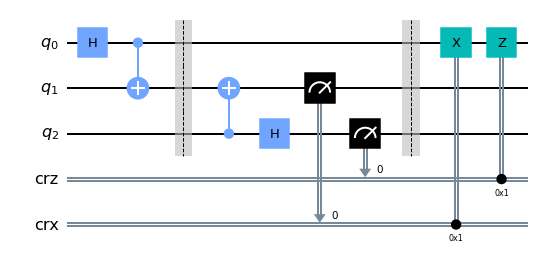

In [10]:
qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx") #Classical Registers
teleportation_circuit = QuantumCircuit(qr, crz, crx)


#STEP 1:  Create the Bell state between q0 and q1
psi_00(teleportation_circuit, 0, 1 )

#STEP 2: Bell Measurement
teleportation_circuit.barrier()
Bell_measurement(teleportation_circuit, 1, 2, crx, crz)

#STEP 3: Conditional Gates
teleportation_circuit.barrier()
conditional_gates(teleportation_circuit,0, crx, crz)
teleportation_circuit.draw()


<b> 4.) Bonus: Check how good teleportation works on actual hardward by considering the fidelity 

In [32]:
def new_conditional_gates(circuit, q0):
    # FILL YOUR CODE HERE


def new_Bell_measurement(circuit, q1, q2):
    # FILL YOUR CODE HERE


    
inverse_init_gate = init_gate.gates_to_uncompute()

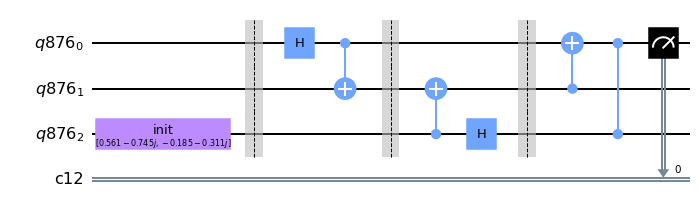

In [92]:
psi = random_state(1)
init_gate = Initialize(psi)
init_gate.label = "init"

qr = QuantumRegister(3)    # Protocol uses 3 qubits
cr=ClassicalRegister(1)
teleportation_circuit = QuantumCircuit(qr, cr)


# STEP 0: let's initialize Bob's q2
teleportation_circuit.append(init_gate, [2])
teleportation_circuit.barrier()

#STEP 1:  Create the Bell state between q0 and q1
psi_00(teleportation_circuit, 0, 1 )

#STEP 2: Bell Measurement
teleportation_circuit.barrier()
new_Bell_measurement(teleportation_circuit, 1, 2)

#STEP 3: Conditional Gates
teleportation_circuit.barrier()
new_conditional_gates(teleportation_circuit,0)

# teleportation_circuit.append(inverse_init_gate, [0])
teleportation_circuit.measure(0,0)
teleportation_circuit.draw()

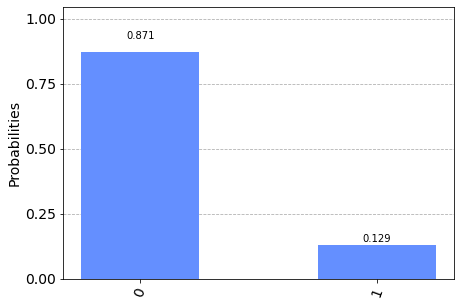

In [98]:
# Build noise model from backend properties
# provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_belem')
noise_model = NoiseModel.from_backend(backend)

# Get coupling map from backend
coupling_map = backend.configuration().coupling_map

# Get basis gates from noise model
basis_gates = noise_model.basis_gates

# Perform a noise simulation
result = execute(teleportation_circuit, Aer.get_backend('qasm_simulator'),
                 coupling_map=coupling_map,
                 basis_gates=basis_gates,
                 noise_model=noise_model).result()
counts = result.get_counts()
plot_histogram(counts)

#Without Noise Model
# backend = provider.get_backend('aer_simulator')
result = execute(teleportation_circuit, Aer.get_backend('qasm_simulator'),
                 coupling_map=coupling_map).result()
counts2 = result.get_counts()
plot_histogram(counts2)

# FILL YOUR CODE HERE to calculate fidelity





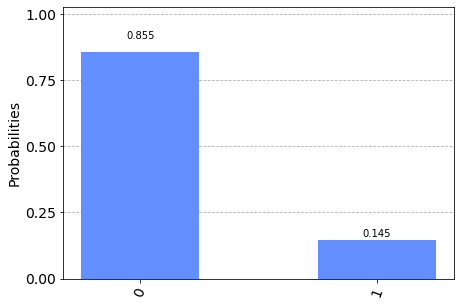

In [99]:
plot_histogram(counts)

In [78]:
print(state1)

[ 5.00000000e-01+7.49400542e-16j  5.00000000e-01+2.77555756e-16j
  5.00000000e-01+2.22044605e-16j  5.00000000e-01-2.22044605e-16j
  9.86076132e-32+2.35513869e-16j -3.92523115e-17+2.74766180e-16j
 -7.39557099e-32-1.57009246e-16j -7.39557099e-32-1.57009246e-16j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.000000